# Análise comparativa de modelos
 - Conjunto de dados: `student_habits_performance` (desempenho dos hábitos dos alunos)
 - Cientistas de dados:
   - Ana Paula Aparecida Pedroso / @pedroso_anapaula
   - Letícia De Albuquerque Souza Leitão / @Letícia
   - Omara Antônia Alves Dos Santos / @saswkie

---

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# pipelines e transformadores
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.compose import ColumnTransformer

# codificação de variáveis
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.feature_extraction.text import CountVectorizer

# normalização
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

# dados faltantes
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer

# modelagem
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_validate, KFold, ShuffleSplit, RandomizedSearchCV

Leitura do conjunto e criação do dicionário de dados

In [ ]:
df = pd.read_csv('https://github.com/atlantico-academy/datasets/raw/main/student_habits_performance.csv')

df_dict = pd.DataFrame([
    {
        "variavel": "student_id",
        "descricao": "identificação do estudante",
        "tipo": "inútil",
        "subtipo": "-",
    },
    {
        "variavel": "age",
        "descricao": "idade do aluno",
        "tipo": "quantitativa",
        "subtipo": "discreta",
    },
    {
        "variavel": "gender",
        "descricao": "Gênero do aluno (Male/Female/Other).",
        "tipo": "qualitativa",
        "subtipo": "nominal",
    },
    {
        "variavel": "study_hours_per_day",
        "descricao": "Indica quantas horas estuda/dia.",
        "tipo": "quantitativa",
        "subtipo": "contínua",
    },
    {
        "variavel": "social_media_hours",
        "descricao": "Indica quantas horas utiliza a rede social.",
        "tipo": "quantitativa",
        "subtipo": "contínua",
    },
    {
        "variavel": "netflix_hours",
        "descricao": "Indica quantas horas utiliza a Netflix.",
        "tipo": "quantitativa",
        "subtipo": "contínua",
    },
    {
        "variavel": "part_time_job",
        "descricao": "trabalha meio período (Yes/No).",
        "tipo": "qualitativa",
        "subtipo": "nominal",
    },
    {
        "variavel": "attendance_percentage",
        "descricao": "Porcentagem de presença nas aulas.",
        "tipo": "quantitativa",
        "subtipo": "contínua",
    },
    {
        "variavel": "sleep_hours",
        "descricao": "Horas de sono por dia.",
        "tipo": "quantitativa",
        "subtipo": "contínua",
    },
    {
        "variavel": "diet_quality",
        "descricao": "Qualidade da dieta (Poor, Fair, Good, Excellent).",
        "tipo": "qualitativa",
        "subtipo": "ordinal",
    },
    {
        "variavel": "exercise_frequency",
        "descricao": "Frequência de exercício por semana.",
        "tipo": "quantitativa",
        "subtipo": "discreta",
    },
    {
        "variavel": "parental_education_level",
        "descricao": "Nível de escolaridade dos pais (High School, Bachelor, Master, PhD).",
        "tipo": "qualitativa",
        "subtipo": "ordinal",
    },
    {
        "variavel": "internet_quality",
        "descricao": "Qualidade da internet (Poor, Average, Good).",
        "tipo": "qualitativa",
        "subtipo": "ordinal",
    },
    {
        "variavel": "mental_health_rating",
        "descricao": "Avaliação da saúde mental em uma escala de 1 a 10.",
        "tipo": "quantitativa",
        "subtipo": "discreta",
    },
    {
        "variavel": "extracurricular_participation",
        "descricao": "Participação em atividades extracurriculares (Yes/No).",
        "tipo": "qualitativa",
        "subtipo": "nominal",
    },
    {
        "variavel": "exam_score",
        "descricao": "Nota no exame.",
        "tipo": "quantitativa",
        "subtipo": "contínua",
    }
])
df_dict


,variavel,descricao,tipo,subtipo
0,student_id,identificação do estudante,inútil,-
1,age,idade do aluno,quantitativa,discreta
2,gender,Gênero do aluno (Male/Female/Other).,qualitativa,nominal
3,study_hours_per_day,Indica quantas horas estuda/dia.,quantitativa,contínua
4,social_media_hours,Indica quantas horas utiliza a rede social.,quantitativa,contínua
5,netflix_hours,Indica quantas horas utiliza a Netflix.,quantitativa,contínua
6,part_time_job,trabalha meio período (Yes/No).,qualitativa,nominal
7,attendance_percentage,Porcentagem de presença nas aulas.,quantitativa,contínua
8,sleep_hours,Horas de sono por dia.,quantitativa,contínua
9,diet_quality,"Qualidade da dieta (Poor, Fair, Good, Excellent).",qualitativa,ordinal


Seleção de variáveis e separação de entradas e saídas

In [ ]:
# @title Seleção de variáveis e separação de entradas e saídas
target_variable = ['exam_score']
useless_variables =  (
    df_dict
    .query("tipo == 'inútil'")
    .variavel
    .to_list()
)
unused_variables = useless_variables + target_variable
nominal_variables = (
    df_dict
    .query("subtipo == 'nominal' and variavel not in @unused_variables")
    .variavel
    .to_list()
)
ordinal_variables = (
    df_dict
    .query("subtipo == 'ordinal' and variavel not in @unused_variables")
    .variavel
    .to_list()
)
continuous_variables = (
    df_dict
    .query("subtipo == 'contínua' and variavel not in @unused_variables")
    .variavel
    .to_list()
)
discrete_variables = (
    df_dict
    .query("subtipo == 'discreta' and variavel not in @unused_variables")
    .variavel
    .to_list()
)

X = df.drop(columns=unused_variables)
y = df[target_variable]

## Preparação de dados

Cada um dos tipos de variáveis foi submetido a um fluxo de tratamento de dados específico, a saber:

### Variáveis quantitativas
 - **Contínuas**: imputação de valores faltantes através da média e normalização min-max.
 - **Discretas**: imputação de valores faltantes através da mediana e normalização min-max.

### Variáveis qualitativas
 - **Ordinais**: imputação de valores faltantes através da moda e codificação via *one-hot encoding*.
 - **Nominais**: imputação de valores faltantes a partir do valor mais frequente e codificação ordinal de valores.

In [ ]:
# variáveis discretas
discrete_preprocessing = Pipeline(steps=[
    ('missing', SimpleImputer(strategy='median')), # tratamento de dados faltantes
    ('normalization', MinMaxScaler()) # normalização
])

# variáveis contínuas
continuous_preprocessing = Pipeline(steps=[
    ('missing', SimpleImputer(strategy='mean')), # tratamento de dados faltantes
    ('normalization', MinMaxScaler()) # normalização
])

# variáveis ordinal
# 1. Definição das ordens corretas para cada variável
diet_order = ['Poor', 'Fair', 'Good', 'Excellent']
education_order = ['High School', 'Bachelor', 'Master', 'PhD']
internet_order = ['Poor', 'Average', 'Good']
# 2. Criação do pipeline com as categorias corretas
ordinal_preprocessing = Pipeline(steps=[
    ('missing', SimpleImputer(strategy='most_frequent')),
    ('encoding', OrdinalEncoder(categories=[
        diet_order,
        education_order,
        internet_order
    ]))
])

# variáveis nominais
nominal_preprocessing = Pipeline(steps=[
    ('missing', SimpleImputer(strategy='most_frequent')), # tratamento de dados faltantes
    ('encoding', OneHotEncoder(sparse_output=False, drop='if_binary'))
])

from sklearn.compose import ColumnTransformer

# Este objeto vai aplicar cada pipeline à sua respectiva coluna
preprocessor = ColumnTransformer(
    transformers=[
        ('discrete', discrete_preprocessing, discrete_variables),
        ('continuous', continuous_preprocessing, continuous_variables),
        ('ordinal', ordinal_preprocessing, ordinal_variables),
        ('nominal', nominal_preprocessing, nominal_variables)
    ],
    remainder='passthrough'
)

print("Pré-processador criado com sucesso!")

Pré-processador criado com sucesso!


## Validação cruzada

Iremos análisar quatro modelos, que serão testados utilizando a validação cruzada de monte-carlo com 30 repetições. Os modelos utilizados na análise são:

 - Regressão linear (Linear Regression)
 - K-vizinhos mais próximos (K-Nearest-Neighbors)
 - Máquinas de vetores-suporte (Support Vector Machine)
 - Árvores de decisão (Decision Tree)

Além disso, cada um desses algoritmos será testado com diferentes hiper-parametros, para que possamos encontrar o melhor modelo e a melhor configuração possível para esse modelo. Tal otimização será realizada utilizando com um validação cruzada k-fold a partir dos dados de treinamento.

Utilizaremos as seguintes métricas para análise:
 - **Erro médio absoluto (*mean absolute error*, MAE)**: mede o erro médio absoluto entre valores reais e previstos. Tem interpretação direta em unidades da variável alvo.
 - **Erro médio quadrático (*mean squared error*, MSE)**: penaliza mais fortemente os grandes erros (pois eleva ao quadrado).
 - **Coeficiente de determinação (R² score)**: mede quanto o modelo consegue reduzir o erro comparado a média dos dados. Varia entre menos infinito até 1. Um bom modelo tende a ter valores próximos de 1.
 - **Erro percentual médio absoluto (*mean absolute percentage error*, MAPE)**: mede o erro percentual médio. É mais indicado quando temos valores de diferentes escalas.

In [ ]:
# @title Implementação dos modelos
preprocessing = ColumnTransformer(transformers=[
    ("ordinal", ordinal_preprocessing, ordinal_variables),
    ("nominal", nominal_preprocessing, nominal_variables),
    ("discrete", discrete_preprocessing, discrete_variables),
    ("continuous", continuous_preprocessing, continuous_variables),
], remainder='passthrough')

modelos = [
    {
        "nome": "LRG",
        "objeto": LinearRegression(),
        "hp": {}
    }, {
        "nome": "KNN",
        "objeto": KNeighborsRegressor(),
        "hp": {
            'n_neighbors': np.arange(1, 31, 5), # Número de vizinhos entre 1 e 30
            'weights': ['uniform', 'distance'], # Peso uniforme ou baseado na distância
            'p': [1, 2] # Distância de Manhattan (p=1) ou Euclidiana (p=2)
        }
    }, {
        "nome": "DTR",
        "objeto": DecisionTreeRegressor(random_state=42),
        "hp": {
            'max_depth': [None] + list(np.arange(2, 20, 4)), # Profundidade máxima
            'max_features': [None, 'sqrt', 'log2'] # Máximo de features
        }
    }, {
        "nome": "SVR",
        "objeto": SVR(),
        "hp": {
            'C': np.logspace(-3, 3, 10),     # Regularização
            'epsilon': np.logspace(-4, 0, 10),  # Insensibilidade à margem
            'kernel': ['linear', 'rbf', 'sigmoid'],  # Kernel a ser usado
        }
    }
]

In [ ]:
# @title Aplicação da validação cruzada
cv = ShuffleSplit(n_splits=30, test_size=.2, random_state=42)
metrics = {
    'neg_mean_absolute_error': 'MAE',
    'neg_mean_squared_error': 'MSE',
    'r2': 'R2',
    'neg_mean_absolute_percentage_error': 'MAPE'
}

results = []
# aplica validação cruzada em todos os modelos
for modelo in modelos:
    # aplicar random search
    random_search = RandomizedSearchCV(
        estimator=modelo["objeto"],
        param_distributions=modelo["hp"],
        n_iter=1 if modelo["nome"] == "LRG" else 10, # Número de combinações de parâmetros a testar
        scoring='neg_mean_squared_error',  # Métrica de avaliação
        cv=5, # Número de divisões para validação cruzada
        random_state=42, # Reprodutibilidade
        n_jobs=-1 # Paralelismo
    )
    # aplica validação cruzada
    approach = Pipeline(steps=[
        ("preprocessing", preprocessing),
        ("model", random_search)
    ])
    metric_results = cross_validate(approach, X=X, y=y.values.ravel(), cv=cv, scoring=list(metrics.keys()))
    # adiciona o nome do modelo ao dicionário de resultados
    metric_results['modelo'] = [modelo["nome"]] * len(metric_results['fit_time'])
    # adiciona os novos resultados a lista final de resultados
    results.append(pd.DataFrame(metric_results))
final_results = pd.concat(results, axis=0)

In [ ]:
# @title Apresentação de resultados

# função para highlight de melhores resultados
def highlight_best(s, props=''):
    if s.name[1] != 'std':
        if s.name[0].endswith('time'):
            return np.where(s == np.min(s.values), props, '')
        if s.name[0].endswith('R2'):
            return np.where(s == np.max(s.values), props, '')
        return np.where(s == np.min(s.values), props, '')

# atualização de valores das métricas
for metric in metrics.keys():
    if 'neg' in metric:
        final_results[f"test_{metric}"] *= -1


# apresentação de resultados
(
    final_results
    .rename(columns={f"test_{name}": value for name, value in metrics.items()})
    .groupby("modelo").agg(["mean", "std"]).T
    .style
    .apply(highlight_best, props='color:white;background-color:gray;font-weight: bold;', axis=1)
    .set_table_styles([{'selector': 'td', 'props': 'text-align: center;'}])
)

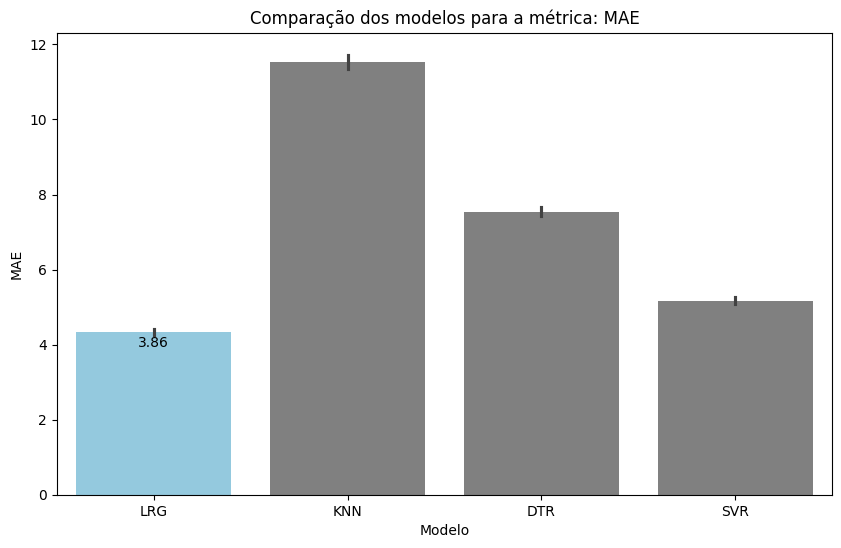

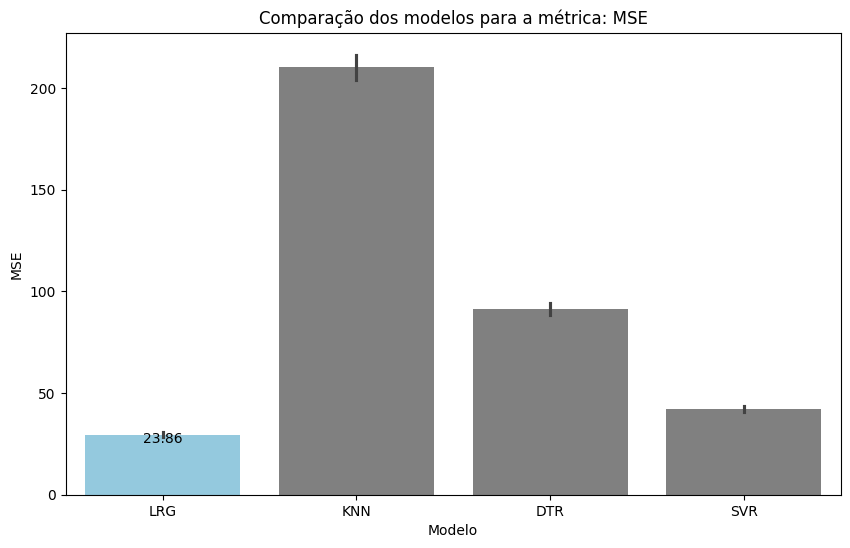

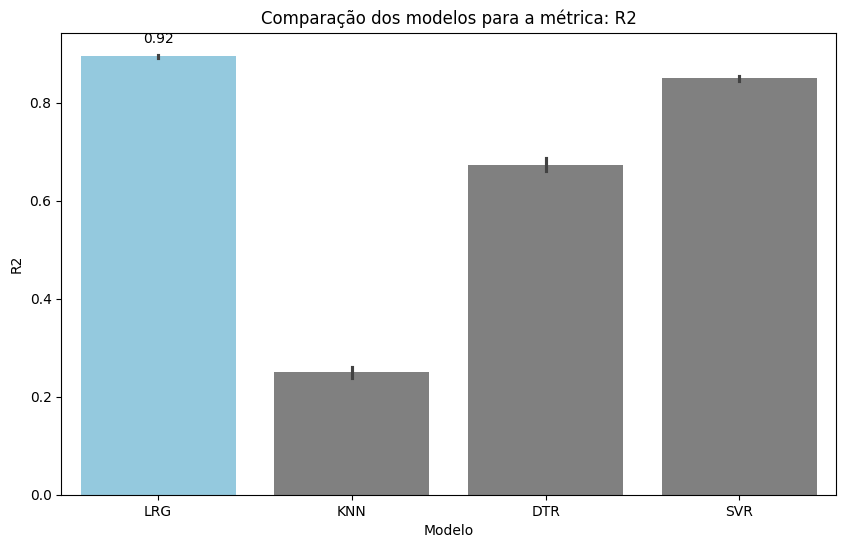

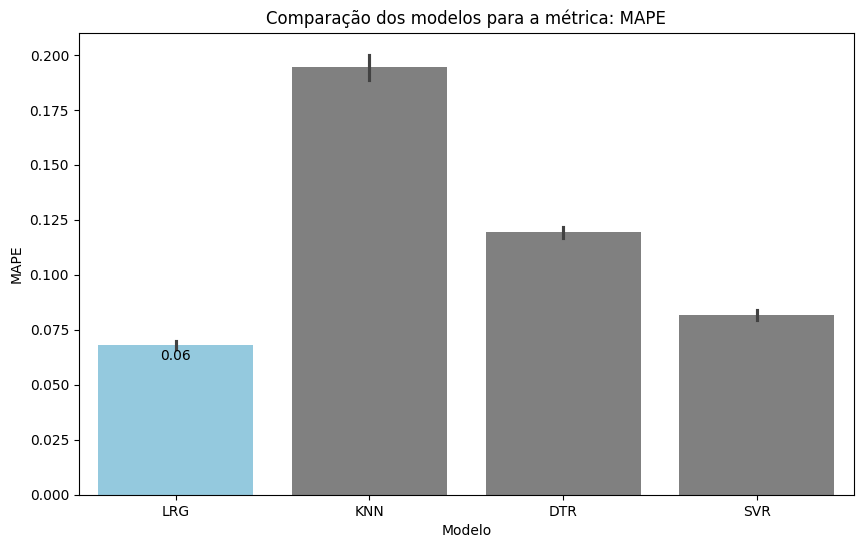

In [ ]:
# @title Gráficos comparativos
import matplotlib.pyplot as plt
import seaborn as sns

# Melt the dataframe to have a long format suitable for seaborn
melted_results = final_results.melt(id_vars=['modelo'],
                                    value_vars=[f'test_{metric}' for metric in metrics.keys()],
                                    var_name='métrica',
                                    value_name='valor')

# Map the internal metric names to the user-friendly names
metric_name_mapping = {f'test_{name}': value for name, value in metrics.items()}
melted_results['métrica'] = melted_results['métrica'].map(metric_name_mapping)

# Create a bar plot for each metric
for metric_name in metrics.values():
    plt.figure(figsize=(10, 6))

    # Determine the best performing model for the current metric
    if metric_name == 'R2':
        # For R2, higher is better
        best_model = melted_results[melted_results['métrica'] == metric_name].loc[melted_results[melted_results['métrica'] == metric_name]['valor'].idxmax()]
    else:
        # For MAE, MSE, MAPE, lower is better
        best_model = melted_results[melted_results['métrica'] == metric_name].loc[melted_results[melted_results['métrica'] == metric_name]['valor'].idxmin()]

    # Create a list of colors with the best model's bar highlighted
    colors = ['gray' if modelo != best_model['modelo'] else 'skyblue' for modelo in melted_results[melted_results['métrica'] == metric_name]['modelo'].unique()]

    # Use barplot, assigning x to hue and setting legend=False
    ax = sns.barplot(x='modelo', y='valor', data=melted_results[melted_results['métrica'] == metric_name], palette=colors, hue='modelo', legend=False)

    # Add annotation for the best performing model
    ax.text(ax.patches[list(melted_results[melted_results['métrica'] == metric_name]['modelo'].unique()).index(best_model['modelo'])].get_x() + ax.patches[list(melted_results[melted_results['métrica'] == metric_name]['modelo'].unique()).index(best_model['modelo'])].get_width()/2.,
            best_model['valor'],
            f'{best_model["valor"]:.2f}',
            ha='center', va='bottom', fontsize=10, color='black')

    plt.title(f'Comparação dos modelos para a métrica: {metric_name}')
    plt.ylabel(metric_name)
    plt.xlabel('Modelo')
    plt.show()
    print("\n")

In [ ]:

# @title Análise da importância de cada feature no modelo de regressão linear
# @markdown A coluna "Coefficient" indica a **mudança esperada na variável alvo** (`exam_score`) para cada aumento de uma unidade na feature correspondente, mantendo todas as outras features constantes. O sinal do coeficiente indica a direção dessa relação (positivo = aumento, negativo = diminuição). Por exemplo, `continuous__study_hours_per_day` tem o **maior coeficiente positivo**, indicando que **mais horas de estudo** estão fortemente associadas a **notas mais altas**. `continuous__social_media_hours` tem um grande coeficiente **negativo**, sugerindo que **mais tempo** gasto nas redes sociais está associado a **notas mais baixas**.

# Treinar o pipeline com o modelo LRG em todo o conjunto de dados
lrg_full_pipeline = Pipeline(steps=[
    ("preprocessing", preprocessing),
    ("model", LinearRegression())
])

lrg_full_pipeline.fit(X, y)

# Acessar o modelo LinearRegression treinado dentro do pipeline
trained_lrg_model = lrg_full_pipeline.named_steps['model']

# Obter os nomes das features após o pré-processamento
# Isso é um pouco mais complexo pois o ColumnTransformer pode gerar novas colunas (OneHotEncoder)
# Uma forma é inspecionar as colunas resultantes após a transformação do X
X_processed = lrg_full_pipeline.named_steps['preprocessing'].transform(X)

# Para modelos lineares, o número de coeficientes deve corresponder ao número de features após o pré-processamento.
# Podemos tentar obter os nomes das features transformadas, mas depende da versão do scikit-learn e da complexidade do ColumnTransformer.

# Uma abordagem mais simples e robusta é criar um DataFrame com os coeficientes e tentar mapeá-los de volta,
# mas a interpretação exata dos coeficientes para variáveis OneHotEncoded requer cuidado.

# Vamos começar exibindo os coeficientes diretamente.
print("Coeficientes do modelo Linear Regression:")
print(trained_lrg_model.coef_)

# Para tentar obter os nomes das features, podemos inspecionar o ColumnTransformer
# Isso pode variar dependendo das transformações (ex: OneHotEncoder cria várias colunas para uma nominal)

# Exemplo básico para tentar obter nomes (pode não funcionar perfeitamente com todas as transformações):
try:
    feature_names = lrg_full_pipeline.named_steps['preprocessing'].get_feature_names_out()
    print("\nNomes das features (após pré-processamento):")
    print(feature_names)

    # Criar um DataFrame para melhor visualização dos coeficientes e nomes das features
    coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': trained_lrg_model.coef_[0]})
    # Ordenar por valor absoluto do coeficiente para ver as mais importantes
    coef_df['Abs_Coefficient'] = abs(coef_df['Coefficient'])
    coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False)

    print("\nImportância das Features (baseado nos coeficientes do LRG):")
    display(coef_df[['Feature', 'Coefficient']])

except Exception as e:
    print("\nNão foi possível obter os nomes das features de forma programática com facilidade.")
    print("Os coeficientes correspondem às features na ordem em que foram processadas pelo ColumnTransformer.")
    print(f"Erro: {e}")

Coeficientes do modelo Linear Regression:
[[-2.81296649e-01 -1.08177791e-02 -2.49625670e-01 -2.85034183e-01
  -1.40145291e-01  4.25179474e-01  2.25956340e-01 -4.33679274e-02
  -1.01261338e-01  8.69139522e+00  1.75193350e+01  7.95394096e+01
  -1.88335164e+01 -1.23076343e+01  6.29498855e+00  1.35717906e+01]]

Nomes das features (após pré-processamento):
['ordinal__diet_quality' 'ordinal__parental_education_level'
 'ordinal__internet_quality' 'nominal__gender_Female'
 'nominal__gender_Male' 'nominal__gender_Other'
 'nominal__part_time_job_Yes' 'nominal__extracurricular_participation_Yes'
 'discrete__age' 'discrete__exercise_frequency'
 'discrete__mental_health_rating' 'continuous__study_hours_per_day'
 'continuous__social_media_hours' 'continuous__netflix_hours'
 'continuous__attendance_percentage' 'continuous__sleep_hours']

Importância das Features (baseado nos coeficientes do LRG):


,Feature,Coefficient
11,continuous__study_hours_per_day,79.539410
12,continuous__social_media_hours,-18.833516
10,discrete__mental_health_rating,17.519335
15,continuous__sleep_hours,13.571791
13,continuous__netflix_hours,-12.307634
9,discrete__exercise_frequency,8.691395
14,continuous__attendance_percentage,6.294989
5,nominal__gender_Other,0.425179
3,nominal__gender_Female,-0.285034
0,ordinal__diet_quality,-0.281297


# Conclusão

Com base na análise comparativa dos modelos e na investigação dos coeficientes do modelo de Regressão Linear (LRG), podemos concluir que o LRG é o modelo mais adequado para prever a variável contínua “exam score” neste conjunto de dados.

O LRG demonstrou o melhor equilíbrio entre precisão (evidenciado pelos menores MAE e MSE, e maior R²) e interpretabilidade em comparação com os modelos KNN, DTR e SVR.

A análise dos coeficientes do modelo LRG oferece insights valiosos sobre a relação linear entre as variáveis de entrada e a nota do exame:

*   A feature com o maior impacto positivo na nota do exame é **`continuous__study_hours_per_day`**, com um coeficiente de aproximadamente **79.54**. Isso sugere fortemente que **aumentar as horas de estudo diárias está associado a um aumento significativo na nota do exame**.
*   Por outro lado, a feature com o maior impacto negativo é **`continuous__social_media_hours`**, com um coeficiente de aproximadamente **-18.83**. Isso indica que **mais tempo gasto em redes sociais está associado a uma diminuição notável na nota do exame**.
*   Outras features que mostram uma relação importante (considerando o valor absoluto do coeficiente) incluem **`discrete__mental_health_rating`** (aproximadamente 17.52), **`continuous__sleep_hours`** (aproximadamente 13.57) e **`continuous__netflix_hours`** (aproximadamente -12.31). Aparentemente, uma melhor avaliação da saúde mental e mais horas de sono estão positivamente associadas à nota, enquanto mais horas na Netflix estão negativamente associadas.

Estes resultados reforçam a ideia de que o desempenho estudantil neste conjunto de dados é influenciado por fatores que têm relações aproximadamente lineares com a nota final, e a Regressão Linear é capaz de capturar essas relações de forma eficaz e interpretável.


ANÁLISE EXPLORATÓRIA DOS DADOS



NameError: name 'df' is not defined

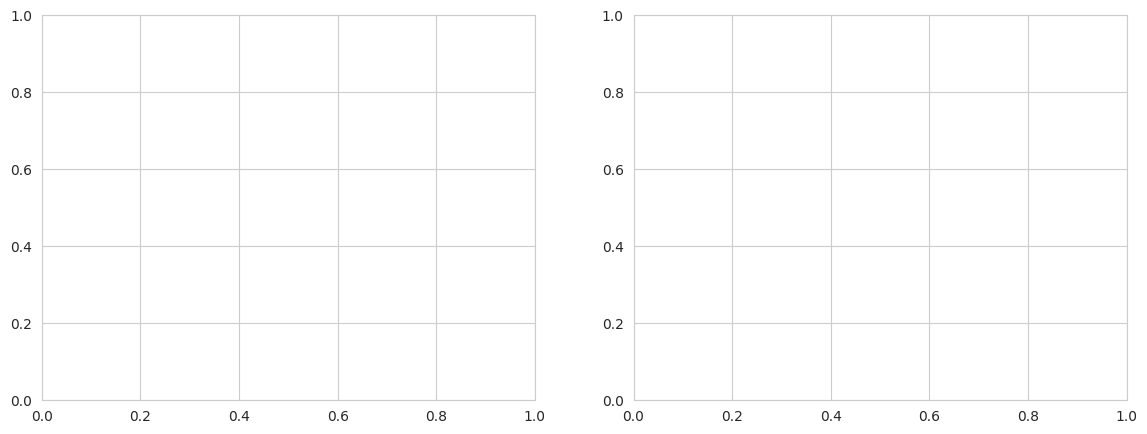

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

print("\n" + "="*60)
print("ANÁLISE EXPLORATÓRIA DOS DADOS")
print("="*60 + "\n")

# Configurar estilo dos gráficos
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# ========== GRÁFICO 1: DISTRIBUIÇÃO DA VARIÁVEL ALVO (EXAM_SCORE) ==========
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histograma
axes[0].hist(df['exam_score'], bins=30, color='#45B7D1', edgecolor='black', alpha=0.7)
axes[0].set_title('Distribuição das Notas do Exame', fontsize=13, fontweight='bold')
axes[0].set_xlabel('Nota do Exame (exam_score)', fontsize=11)
axes[0].set_ylabel('Frequência', fontsize=11)
axes[0].grid(axis='y', alpha=0.3)

# Box plot
axes[1].boxplot(df['exam_score'], vert=True)
axes[1].set_title('Box Plot das Notas do Exame', fontsize=13, fontweight='bold')
axes[1].set_ylabel('Nota do Exame (exam_score)', fontsize=11)
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Estatísticas da Variável Alvo (exam_score):")
print(f"  - Média: {df['exam_score'].mean():.2f}")
print(f"  - Mediana: {df['exam_score'].median():.2f}")
print(f"  - Desvio Padrão: {df['exam_score'].std():.2f}")
print(f"  - Mínimo: {df['exam_score'].min():.2f}")
print(f"  - Máximo: {df['exam_score'].max():.2f}\n")

# ========== GRÁFICO 2: DISTRIBUIÇÃO DAS VARIÁVEIS CONTÍNUAS ==========
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
fig.suptitle('Distribuição das Variáveis Contínuas', fontsize=15, fontweight='bold', y=1.00)

continuous_vars = ['study_hours_per_day', 'attendance_percentage', 'sleep_hours',
                   'social_media_hours', 'netflix_hours']

for idx, var in enumerate(continuous_vars):
    row = idx // 3
    col = idx % 3

    axes[row, col].hist(df[var], bins=25, color='#FF6B6B', edgecolor='black', alpha=0.7)
    axes[row, col].set_title(f'Distribuição de {var}', fontsize=11, fontweight='bold')
    axes[row, col].set_xlabel(var, fontsize=10)
    axes[row, col].set_ylabel('Frequência', fontsize=10)
    axes[row, col].grid(axis='y', alpha=0.3)

# Remover o último subplot vazio
axes[1, 2].remove()

plt.tight_layout()
plt.show()

# ========== GRÁFICO 3: CORRELAÇÃO ENTRE VARIÁVEIS ==========
# Selecionar apenas variáveis numéricas para correlação
numeric_cols = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_cols].corr()

fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8},
            ax=ax, vmin=-1, vmax=1)
ax.set_title('Matriz de Correlação entre Variáveis', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# ========== GRÁFICO 4: RELAÇÃO ENTRE HORAS DE ESTUDO E NOTA DO EXAME ==========
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(df['study_hours_per_day'], df['exam_score'], alpha=0.6, s=50, color='#4ECDC4', edgecolors='black')

# Adicionar linha de tendência
z = np.polyfit(df['study_hours_per_day'], df['exam_score'], 1)
p = np.poly1d(z)
ax.plot(df['study_hours_per_day'].sort_values(), p(df['study_hours_per_day'].sort_values()),
        "r--", linewidth=2, label='Tendência Linear')

ax.set_title('Relação entre Horas de Estudo e Nota do Exame', fontsize=13, fontweight='bold')
ax.set_xlabel('Horas de Estudo por Dia', fontsize=11)
ax.set_ylabel('Nota do Exame', fontsize=11)
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# ========== GRÁFICO 5: RELAÇÃO ENTRE HORAS DE SONO E NOTA DO EXAME ==========
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(df['sleep_hours'], df['exam_score'], alpha=0.6, s=50, color='#FFA07A', edgecolors='black')

# Adicionar linha de tendência
z = np.polyfit(df['sleep_hours'], df['exam_score'], 1)
p = np.poly1d(z)
ax.plot(df['sleep_hours'].sort_values(), p(df['sleep_hours'].sort_values()),
        "r--", linewidth=2, label='Tendência Linear')

ax.set_title('Relação entre Horas de Sono e Nota do Exame', fontsize=13, fontweight='bold')
ax.set_xlabel('Horas de Sono por Dia', fontsize=11)
ax.set_ylabel('Nota do Exame', fontsize=11)
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# ========== GRÁFICO 6: RELAÇÃO ENTRE PRESENÇA E NOTA DO EXAME ==========
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(df['attendance_percentage'], df['exam_score'], alpha=0.6, s=50, color='#45B7D1', edgecolors='black')

# Adicionar linha de tendência
z = np.polyfit(df['attendance_percentage'], df['exam_score'], 1)
p = np.poly1d(z)
ax.plot(df['attendance_percentage'].sort_values(), p(df['attendance_percentage'].sort_values()),
        "r--", linewidth=2, label='Tendência Linear')

ax.set_title('Relação entre Presença e Nota do Exame', fontsize=13, fontweight='bold')
ax.set_xlabel('Percentual de Presença (%)', fontsize=11)
ax.set_ylabel('Nota do Exame', fontsize=11)
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# ========== GRÁFICO 7: RELAÇÃO ENTRE USO DE MÍDIA SOCIAL E NOTA DO EXAME ==========
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(df['social_media_hours'], df['exam_score'], alpha=0.6, s=50, color='#FF6B6B', edgecolors='black')

# Adicionar linha de tendência
z = np.polyfit(df['social_media_hours'], df['exam_score'], 1)
p = np.poly1d(z)
ax.plot(df['social_media_hours'].sort_values(), p(df['social_media_hours'].sort_values()),
        "r--", linewidth=2, label='Tendência Linear')

ax.set_title('Relação entre Uso de Mídia Social e Nota do Exame', fontsize=13, fontweight='bold')
ax.set_xlabel('Horas de Mídia Social por Dia', fontsize=11)
ax.set_ylabel('Nota do Exame', fontsize=11)
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# ========== GRÁFICO 8: COMPARAÇÃO DE NOTAS POR QUALIDADE DE DIETA ==========
fig, ax = plt.subplots(figsize=(10, 6))
diet_order = ['Poor', 'Fair', 'Good', 'Excellent']
df_diet = df[df['diet_quality'].isin(diet_order)]
sns.boxplot(data=df_diet, x='diet_quality', y='exam_score', order=diet_order,
            palette=['#FF6B6B', '#FFA07A', '#45B7D1', '#4ECDC4'], ax=ax)
ax.set_title('Distribuição de Notas por Qualidade de Dieta', fontsize=13, fontweight='bold')
ax.set_xlabel('Qualidade da Dieta', fontsize=11)
ax.set_ylabel('Nota do Exame', fontsize=11)
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# ========== GRÁFICO 9: COMPARAÇÃO DE NOTAS POR NÍVEL DE EDUCAÇÃO DOS PAIS ==========
fig, ax = plt.subplots(figsize=(10, 6))
education_order = ['High School', 'Bachelor', 'Master', 'PhD']
df_education = df[df['parental_education_level'].isin(education_order)]
sns.boxplot(data=df_education, x='parental_education_level', y='exam_score', order=education_order,
            palette=['#FF6B6B', '#FFA07A', '#45B7D1', '#4ECDC4'], ax=ax)
ax.set_title('Distribuição de Notas por Nível de Educação dos Pais', fontsize=13, fontweight='bold')
ax.set_xlabel('Nível de Educação dos Pais', fontsize=11)
ax.set_ylabel('Nota do Exame', fontsize=11)
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# ========== GRÁFICO 10: COMPARAÇÃO DE NOTAS POR QUALIDADE DE INTERNET ==========
fig, ax = plt.subplots(figsize=(10, 6))
internet_order = ['Poor', 'Average', 'Good']
df_internet = df[df['internet_quality'].isin(internet_order)]
sns.boxplot(data=df_internet, x='internet_quality', y='exam_score', order=internet_order,
            palette=['#FF6B6B', '#FFA07A', '#45B7D1'], ax=ax)
ax.set_title('Distribuição de Notas por Qualidade de Internet', fontsize=13, fontweight='bold')
ax.set_xlabel('Qualidade da Internet', fontsize=11)
ax.set_ylabel('Nota do Exame', fontsize=11)
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# ========== ESTATÍSTICAS DESCRITIVAS ==========
print("\n" + "="*60)
print("ESTATÍSTICAS DESCRITIVAS DO CONJUNTO DE DADOS")
print("="*60)
print(df.describe())
print("\n")

# ========== CORRELAÇÃO COM A VARIÁVEL ALVO ==========
print("="*60)
print("CORRELAÇÃO COM A VARIÁVEL ALVO (exam_score)")
print("="*60)
correlations_with_target = df[numeric_cols].corr()['exam_score'].sort_values(ascending=False)
print(correlations_with_target)
print("\n")


ANÁLISE EXPLORATÓRIA DOS DADOS



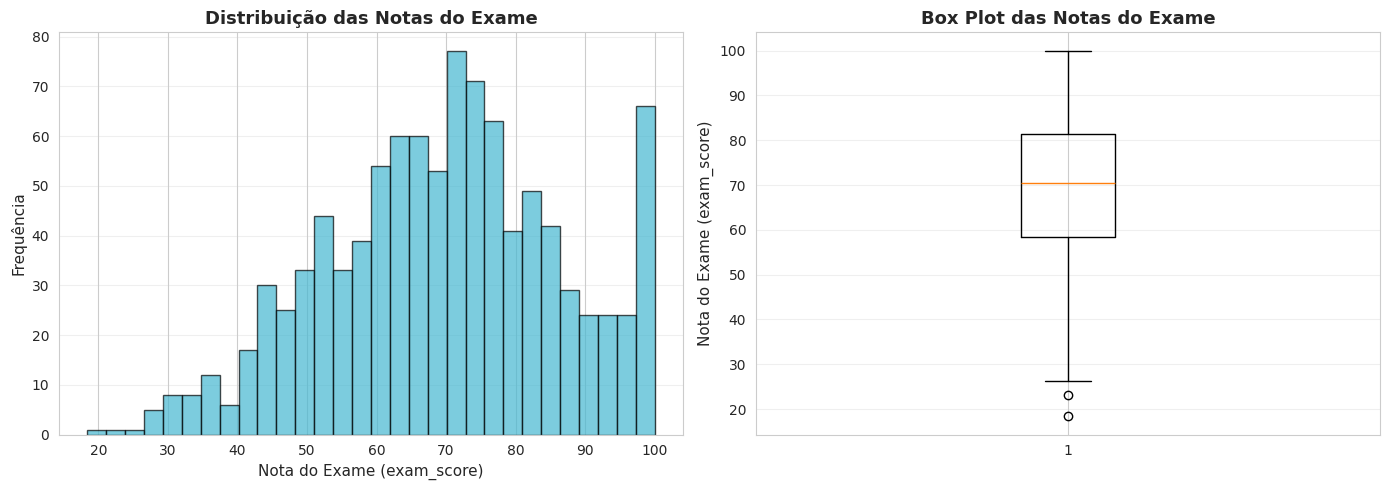

Estatísticas da Variável Alvo (exam_score):
  - Média: 69.60
  - Mediana: 70.50
  - Desvio Padrão: 16.89
  - Mínimo: 18.40
  - Máximo: 100.00



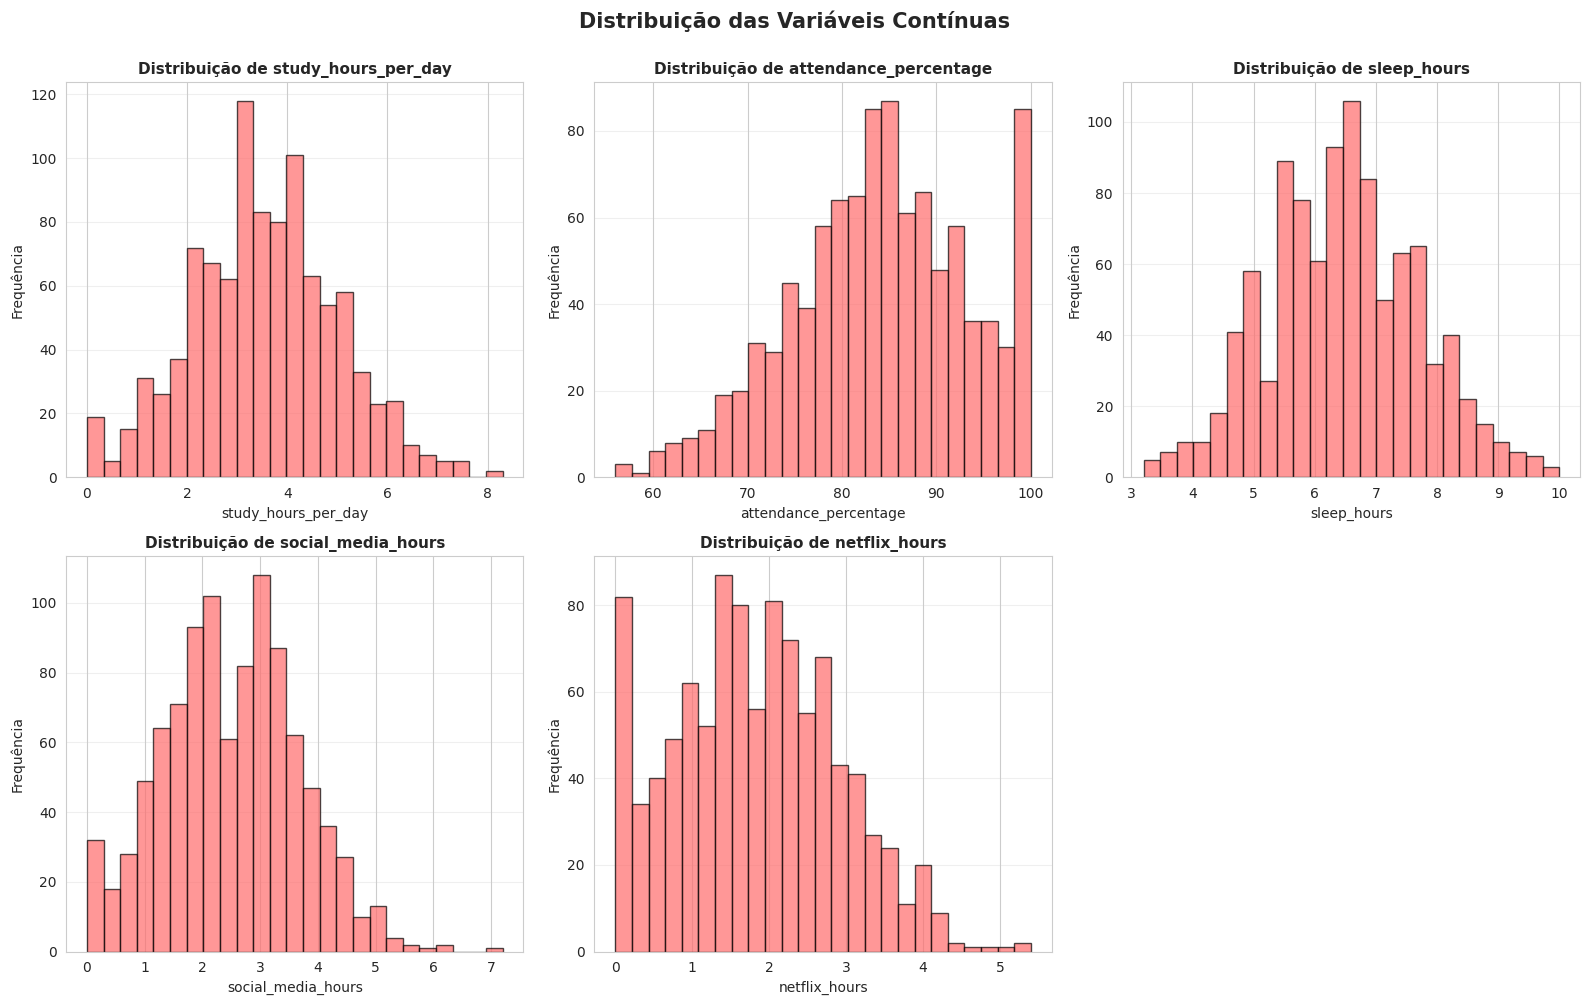

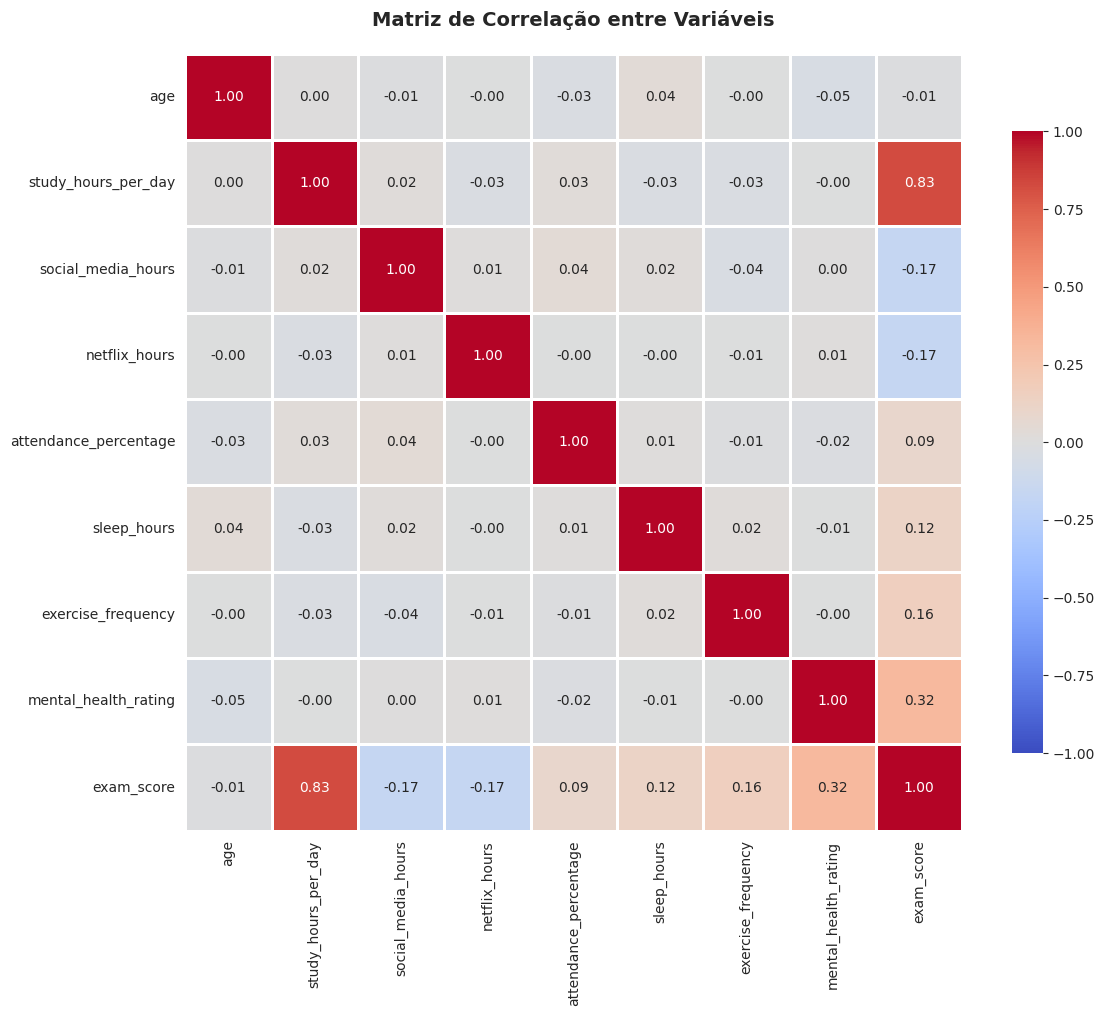

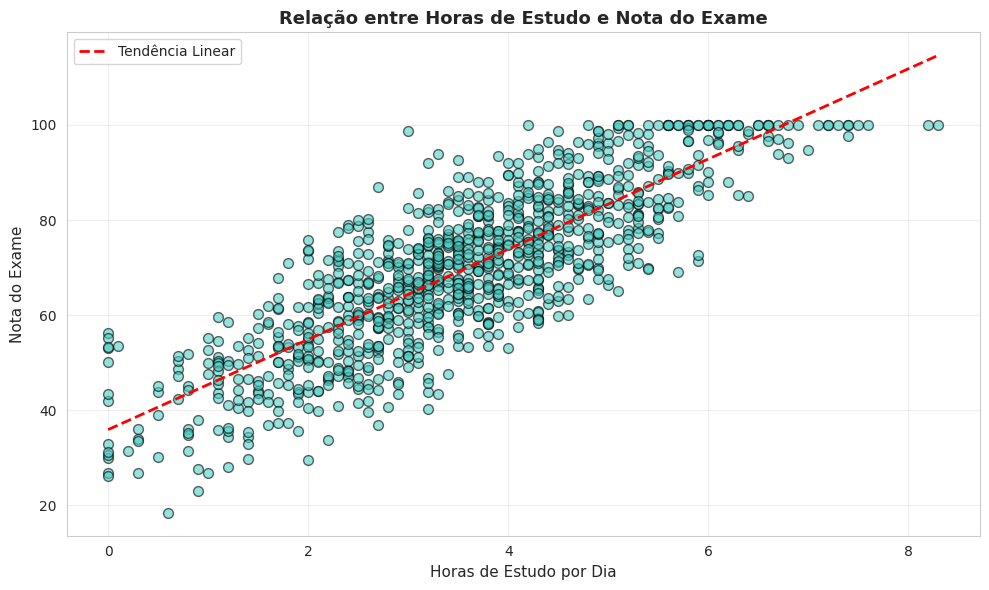

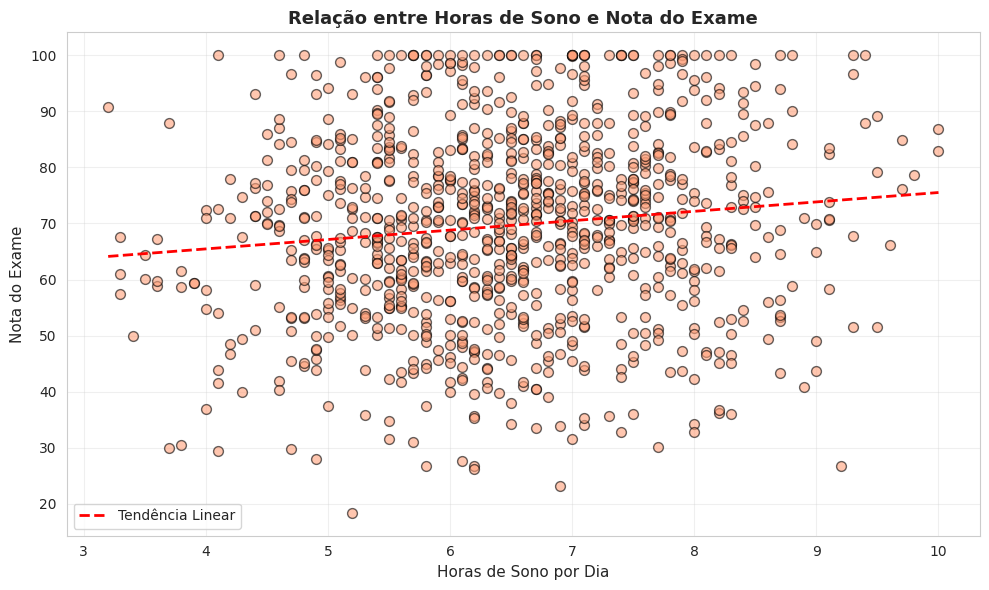

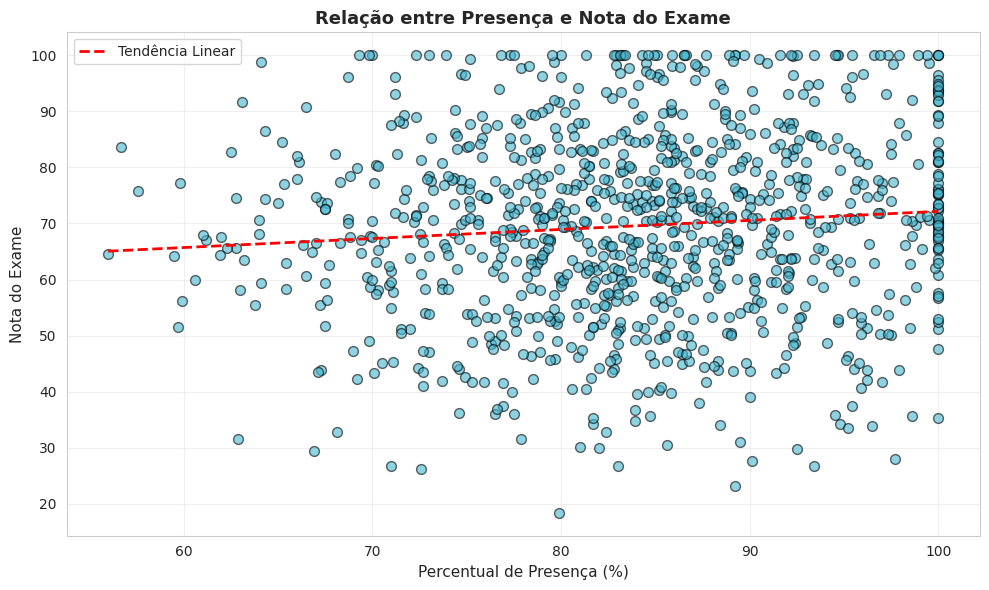

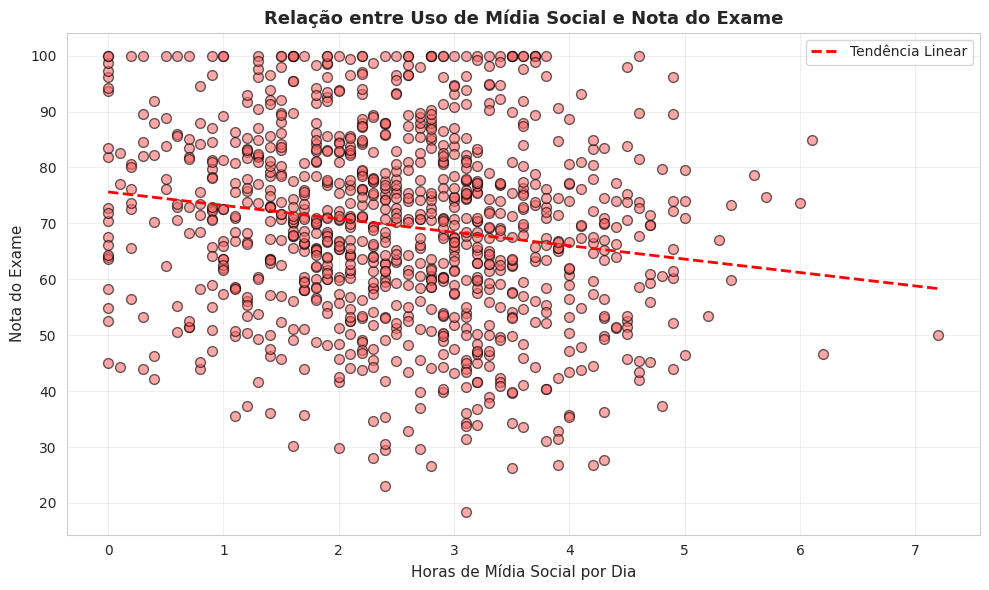

/tmp/ipython-input-3346535370.py:151: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_diet, x='diet_quality', y='exam_score', order=diet_order,


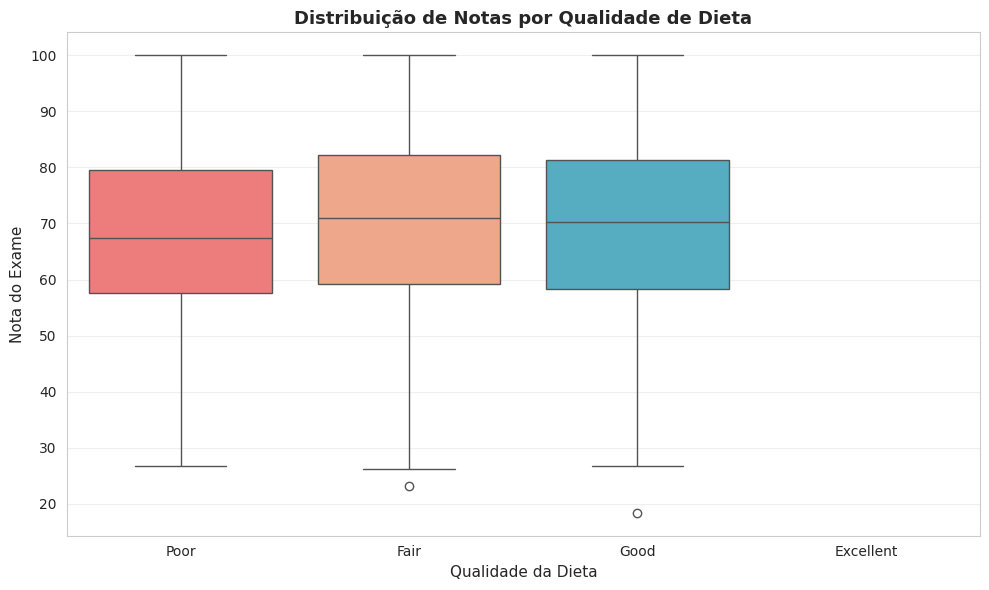

/tmp/ipython-input-3346535370.py:164: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_education, x='parental_education_level', y='exam_score', order=education_order,


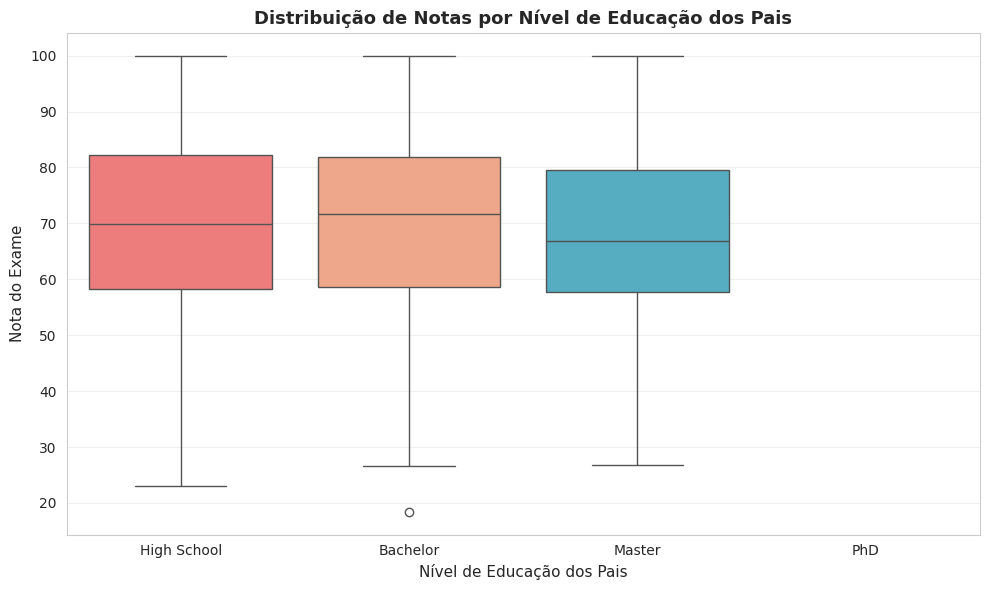

/tmp/ipython-input-3346535370.py:177: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_internet, x='internet_quality', y='exam_score', order=internet_order,


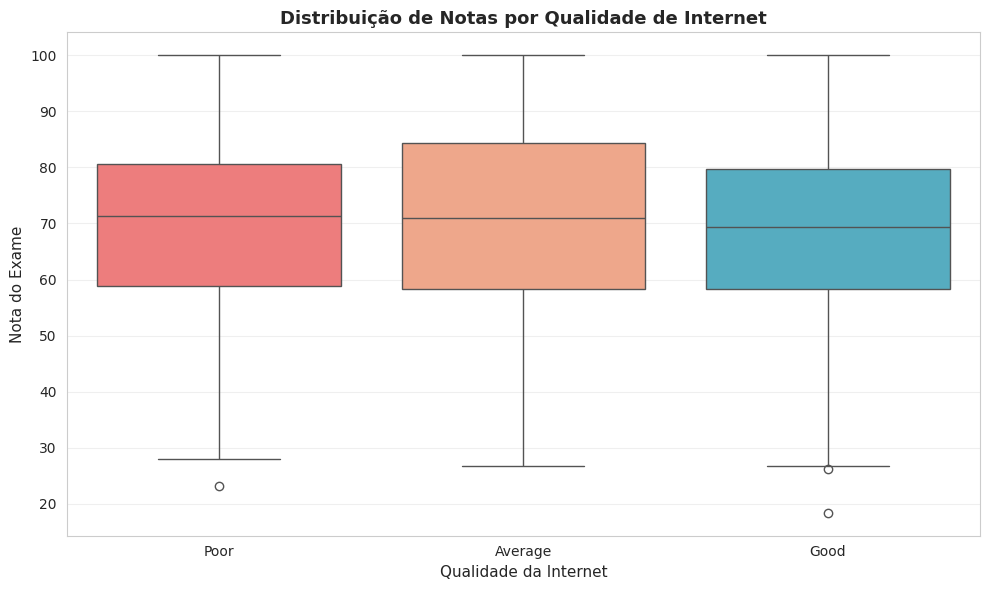


ESTATÍSTICAS DESCRITIVAS DO CONJUNTO DE DADOS
             age  study_hours_per_day  social_media_hours  netflix_hours  \
count  1000.0000           1000.00000         1000.000000    1000.000000   
mean     20.4980              3.55010            2.505500       1.819700   
std       2.3081              1.46889            1.172422       1.075118   
min      17.0000              0.00000            0.000000       0.000000   
25%      18.7500              2.60000            1.700000       1.000000   
50%      20.0000              3.50000            2.500000       1.800000   
75%      23.0000              4.50000            3.300000       2.525000   
max      24.0000              8.30000            7.200000       5.400000   

       attendance_percentage  sleep_hours  exercise_frequency  \
count            1000.000000  1000.000000         1000.000000   
mean               84.131700     6.470100            3.042000   
std                 9.399246     1.226377            2.025423   
min     

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

print("\n" + "="*60)
print("ANÁLISE EXPLORATÓRIA DOS DADOS")
print("="*60 + "\n")

# Configurar estilo dos gráficos
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# ========== GRÁFICO 1: DISTRIBUIÇÃO DA VARIÁVEL ALVO (EXAM_SCORE) ==========
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histograma
axes[0].hist(df['exam_score'], bins=30, color='#45B7D1', edgecolor='black', alpha=0.7)
axes[0].set_title('Distribuição das Notas do Exame', fontsize=13, fontweight='bold')
axes[0].set_xlabel('Nota do Exame (exam_score)', fontsize=11)
axes[0].set_ylabel('Frequência', fontsize=11)
axes[0].grid(axis='y', alpha=0.3)

# Box plot
axes[1].boxplot(df['exam_score'], vert=True)
axes[1].set_title('Box Plot das Notas do Exame', fontsize=13, fontweight='bold')
axes[1].set_ylabel('Nota do Exame (exam_score)', fontsize=11)
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Estatísticas da Variável Alvo (exam_score):")
print(f"  - Média: {df['exam_score'].mean():.2f}")
print(f"  - Mediana: {df['exam_score'].median():.2f}")
print(f"  - Desvio Padrão: {df['exam_score'].std():.2f}")
print(f"  - Mínimo: {df['exam_score'].min():.2f}")
print(f"  - Máximo: {df['exam_score'].max():.2f}\n")

# ========== GRÁFICO 2: DISTRIBUIÇÃO DAS VARIÁVEIS CONTÍNUAS ==========
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
fig.suptitle('Distribuição das Variáveis Contínuas', fontsize=15, fontweight='bold', y=1.00)

continuous_vars = ['study_hours_per_day', 'attendance_percentage', 'sleep_hours',
                   'social_media_hours', 'netflix_hours']

for idx, var in enumerate(continuous_vars):
    row = idx // 3
    col = idx % 3

    axes[row, col].hist(df[var], bins=25, color='#FF6B6B', edgecolor='black', alpha=0.7)
    axes[row, col].set_title(f'Distribuição de {var}', fontsize=11, fontweight='bold')
    axes[row, col].set_xlabel(var, fontsize=10)
    axes[row, col].set_ylabel('Frequência', fontsize=10)
    axes[row, col].grid(axis='y', alpha=0.3)

# Remover o último subplot vazio
axes[1, 2].remove()

plt.tight_layout()
plt.show()

# ========== GRÁFICO 3: CORRELAÇÃO ENTRE VARIÁVEIS ==========
# Selecionar apenas variáveis numéricas para correlação
numeric_cols = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_cols].corr()

fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8},
            ax=ax, vmin=-1, vmax=1)
ax.set_title('Matriz de Correlação entre Variáveis', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# ========== GRÁFICO 4: RELAÇÃO ENTRE HORAS DE ESTUDO E NOTA DO EXAME ==========
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(df['study_hours_per_day'], df['exam_score'], alpha=0.6, s=50, color='#4ECDC4', edgecolors='black')

# Adicionar linha de tendência
z = np.polyfit(df['study_hours_per_day'], df['exam_score'], 1)
p = np.poly1d(z)
ax.plot(df['study_hours_per_day'].sort_values(), p(df['study_hours_per_day'].sort_values()),
        "r--", linewidth=2, label='Tendência Linear')

ax.set_title('Relação entre Horas de Estudo e Nota do Exame', fontsize=13, fontweight='bold')
ax.set_xlabel('Horas de Estudo por Dia', fontsize=11)
ax.set_ylabel('Nota do Exame', fontsize=11)
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# ========== GRÁFICO 5: RELAÇÃO ENTRE HORAS DE SONO E NOTA DO EXAME ==========
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(df['sleep_hours'], df['exam_score'], alpha=0.6, s=50, color='#FFA07A', edgecolors='black')

# Adicionar linha de tendência
z = np.polyfit(df['sleep_hours'], df['exam_score'], 1)
p = np.poly1d(z)
ax.plot(df['sleep_hours'].sort_values(), p(df['sleep_hours'].sort_values()),
        "r--", linewidth=2, label='Tendência Linear')

ax.set_title('Relação entre Horas de Sono e Nota do Exame', fontsize=13, fontweight='bold')
ax.set_xlabel('Horas de Sono por Dia', fontsize=11)
ax.set_ylabel('Nota do Exame', fontsize=11)
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# ========== GRÁFICO 6: RELAÇÃO ENTRE PRESENÇA E NOTA DO EXAME ==========
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(df['attendance_percentage'], df['exam_score'], alpha=0.6, s=50, color='#45B7D1', edgecolors='black')

# Adicionar linha de tendência
z = np.polyfit(df['attendance_percentage'], df['exam_score'], 1)
p = np.poly1d(z)
ax.plot(df['attendance_percentage'].sort_values(), p(df['attendance_percentage'].sort_values()),
        "r--", linewidth=2, label='Tendência Linear')

ax.set_title('Relação entre Presença e Nota do Exame', fontsize=13, fontweight='bold')
ax.set_xlabel('Percentual de Presença (%)', fontsize=11)
ax.set_ylabel('Nota do Exame', fontsize=11)
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# ========== GRÁFICO 7: RELAÇÃO ENTRE USO DE MÍDIA SOCIAL E NOTA DO EXAME ==========
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(df['social_media_hours'], df['exam_score'], alpha=0.6, s=50, color='#FF6B6B', edgecolors='black')

# Adicionar linha de tendência
z = np.polyfit(df['social_media_hours'], df['exam_score'], 1)
p = np.poly1d(z)
ax.plot(df['social_media_hours'].sort_values(), p(df['social_media_hours'].sort_values()),
        "r--", linewidth=2, label='Tendência Linear')

ax.set_title('Relação entre Uso de Mídia Social e Nota do Exame', fontsize=13, fontweight='bold')
ax.set_xlabel('Horas de Mídia Social por Dia', fontsize=11)
ax.set_ylabel('Nota do Exame', fontsize=11)
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# ========== GRÁFICO 8: COMPARAÇÃO DE NOTAS POR QUALIDADE DE DIETA ==========
fig, ax = plt.subplots(figsize=(10, 6))
diet_order = ['Poor', 'Fair', 'Good', 'Excellent']
df_diet = df[df['diet_quality'].isin(diet_order)]
sns.boxplot(data=df_diet, x='diet_quality', y='exam_score', order=diet_order,
            palette=['#FF6B6B', '#FFA07A', '#45B7D1', '#4ECDC4'], ax=ax)
ax.set_title('Distribuição de Notas por Qualidade de Dieta', fontsize=13, fontweight='bold')
ax.set_xlabel('Qualidade da Dieta', fontsize=11)
ax.set_ylabel('Nota do Exame', fontsize=11)
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# ========== GRÁFICO 9: COMPARAÇÃO DE NOTAS POR NÍVEL DE EDUCAÇÃO DOS PAIS ==========
fig, ax = plt.subplots(figsize=(10, 6))
education_order = ['High School', 'Bachelor', 'Master', 'PhD']
df_education = df[df['parental_education_level'].isin(education_order)]
sns.boxplot(data=df_education, x='parental_education_level', y='exam_score', order=education_order,
            palette=['#FF6B6B', '#FFA07A', '#45B7D1', '#4ECDC4'], ax=ax)
ax.set_title('Distribuição de Notas por Nível de Educação dos Pais', fontsize=13, fontweight='bold')
ax.set_xlabel('Nível de Educação dos Pais', fontsize=11)
ax.set_ylabel('Nota do Exame', fontsize=11)
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# ========== GRÁFICO 10: COMPARAÇÃO DE NOTAS POR QUALIDADE DE INTERNET ==========
fig, ax = plt.subplots(figsize=(10, 6))
internet_order = ['Poor', 'Average', 'Good']
df_internet = df[df['internet_quality'].isin(internet_order)]
sns.boxplot(data=df_internet, x='internet_quality', y='exam_score', order=internet_order,
            palette=['#FF6B6B', '#FFA07A', '#45B7D1'], ax=ax)
ax.set_title('Distribuição de Notas por Qualidade de Internet', fontsize=13, fontweight='bold')
ax.set_xlabel('Qualidade da Internet', fontsize=11)
ax.set_ylabel('Nota do Exame', fontsize=11)
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# ========== ESTATÍSTICAS DESCRITIVAS ==========
print("\n" + "="*60)
print("ESTATÍSTICAS DESCRITIVAS DO CONJUNTO DE DADOS")
print("="*60)
print(df.describe())
print("\n")

# ========== CORRELAÇÃO COM A VARIÁVEL ALVO ==========
print("="*60)
print("CORRELAÇÃO COM A VARIÁVEL ALVO (exam_score)")
print("="*60)
correlations_with_target = df[numeric_cols].corr()['exam_score'].sort_values(ascending=False)
print(correlations_with_target)
print("\n")

In [ ]:
import pandas as pd

df = pd.read_csv('https://github.com/atlantico-academy/datasets/raw/main/student_habits_performance.csv')

df_dict = pd.DataFrame([
    {
        "variavel": "student_id",
        "descricao": "identificação do estudante",
        "tipo": "inútil",
        "subtipo": "-",
    },
    {
        "variavel": "age",
        "descricao": "idade do aluno",
        "tipo": "quantitativa",
        "subtipo": "discreta",
    },
    {
        "variavel": "gender",
        "descricao": "Gênero do aluno (Male/Female/Other).",
        "tipo": "qualitativa",
        "subtipo": "nominal",
    },
    {
        "variavel": "study_hours_per_day",
        "descricao": "Indica quantas horas estuda/dia.",
        "tipo": "quantitativa",
        "subtipo": "contínua",
    },
    {
        "variavel": "social_media_hours",
        "descricao": "Indica quantas horas utiliza a rede social.",
        "tipo": "quantitativa",
        "subtipo": "contínua",
    },
    {
        "variavel": "netflix_hours",
        "descricao": "Indica quantas horas utiliza a Netflix.",
        "tipo": "quantitativa",
        "subtipo": "contínua",
    },
    {
        "variavel": "part_time_job",
        "descricao": "trabalha meio período (Yes/No).",
        "tipo": "qualitativa",
        "subtipo": "nominal",
    },
    {
        "variavel": "attendance_percentage",
        "descricao": "Porcentagem de presença nas aulas.",
        "tipo": "quantitativa",
        "subtipo": "contínua",
    },
    {
        "variavel": "sleep_hours",
        "descricao": "Horas de sono por dia.",
        "tipo": "quantitativa",
        "subtipo": "contínua",
    },
    {
        "variavel": "diet_quality",
        "descricao": "Qualidade da dieta (Poor, Fair, Good, Excellent).",
        "tipo": "qualitativa",
        "subtipo": "ordinal",
    },
    {
        "variavel": "exercise_frequency",
        "descricao": "Frequência de exercício por semana.",
        "tipo": "quantitativa",
        "subtipo": "discreta",
    },
    {
        "variavel": "parental_education_level",
        "descricao": "Nível de escolaridade dos pais (High School, Bachelor, Master, PhD).",
        "tipo": "qualitativa",
        "subtipo": "ordinal",
    },
    {
        "variavel": "internet_quality",
        "descricao": "Qualidade da internet (Poor, Average, Good).",
        "tipo": "qualitativa",
        "subtipo": "ordinal",
    },
    {
        "variavel": "mental_health_rating",
        "descricao": "Avaliação da saúde mental em uma escala de 1 a 10.",
        "tipo": "quantitativa",
        "subtipo": "discreta",
    },
    {
        "variavel": "extracurricular_participation",
        "descricao": "Participação em atividades extracurriculares (Yes/No).",
        "tipo": "qualitativa",
        "subtipo": "nominal",
    },
    {
        "variavel": "exam_score",
        "descricao": "Nota no exame.",
        "tipo": "quantitativa",
        "subtipo": "contínua",
    }
])
display(df_dict)

,variavel,descricao,tipo,subtipo
0,student_id,identificação do estudante,inútil,-
1,age,idade do aluno,quantitativa,discreta
2,gender,Gênero do aluno (Male/Female/Other).,qualitativa,nominal
3,study_hours_per_day,Indica quantas horas estuda/dia.,quantitativa,contínua
4,social_media_hours,Indica quantas horas utiliza a rede social.,quantitativa,contínua
5,netflix_hours,Indica quantas horas utiliza a Netflix.,quantitativa,contínua
6,part_time_job,trabalha meio período (Yes/No).,qualitativa,nominal
7,attendance_percentage,Porcentagem de presença nas aulas.,quantitativa,contínua
8,sleep_hours,Horas de sono por dia.,quantitativa,contínua
9,diet_quality,"Qualidade da dieta (Poor, Fair, Good, Excellent).",qualitativa,ordinal
